<a href="https://colab.research.google.com/github/chelomec/airlines_delay_prediction/blob/main/Proyecto_DataScienceII_ML_Clasificaci%C3%B3n_Demora_Vuelos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# DEMORAS EN VUELOS

##INTRODUCCIÓN

Con el creciente volumen de viajes aéreos y la complejidad de las operaciones aeroportuarias, la predicción precisa de retrasos y cancelaciones de vuelos es crucial para mejorar la eficiencia operativa y la experiencia del pasajero. Utilizando datos históricos de vuelos en EE.UU, se busca identificar patrones y factores determinantes que influyen en la puntualidad de los vuelos y definir de manera anticipada si un vuelo sufrirá un retraso o no.

###ABSTRACT
El presente estudio se centra en el análisis de datos históricos de vuelos operados por líneas aéreas estadounidenses durante el año 2019, con el fin de identificar los factores que influyen en la puntualidad y demoras en los vuelos operados por las diferentes líneas áreas. La puntualidad de los vuelos es un aspecto crítico para la eficiencia operativa de las aerolíneas y la satisfacción del pasajero, siendo la predicción de retrasos una tarea esencial en la gestión de operaciones aeroportuarias.

El dataset utilizado permite obtener datos sobre la fechas en que seralizaron los vuelos, datos operativos para cada vuelo, datos del operador, datos del aeropuerto y condiciones meteorológicas. Es con esta información que se buscará identificar patrones y relaciones significativas que puedan predecir retrasos.

##OBJETIVO
**Predicir si un vuelo sufrirá una demora mayor a los 15 min o no.**

##LIBRERIAS
Se deja en este espacio las librerías que se utilizan en el proyecto.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import kagglehub
import os
import missingno as msno

##DATASET

El dataset elegido para el desarrollo del caso son los datos de demoras de los vuelos de las aerolíneas en el año 2019 en función del clima y del aeropuerto. Este dataset se encuentra en kaggle en el siguiente link.

https://www.kaggle.com/datasets/threnjen/2019-airline-delays-and-cancellations

De igual manera, se conecta el dataset con el notebook para trabajar con el mismo.

In [2]:
# Download latest version
dataset_dir = kagglehub.dataset_download("threnjen/2019-airline-delays-and-cancellations")

print("Path to dataset files:", dataset_dir)

# Find the CSV file within the downloaded directory
for filename in os.listdir(dataset_dir ):
    if filename.endswith("train.csv"):
        csv_file_path = os.path.join(dataset_dir, filename)
        break  # Stop searching after finding the first CSV file

# Now read the CSV file using the correct file path
df = pd.read_csv(csv_file_path)
df.head()

Path to dataset files: /root/.cache/kagglehub/datasets/threnjen/2019-airline-delays-and-cancellations/versions/9


,MONTH,DAY_OF_WEEK,DEP_DEL15,DEP_TIME_BLK,DISTANCE_GROUP,SEGMENT_NUMBER,CONCURRENT_FLIGHTS,NUMBER_OF_SEATS,CARRIER_NAME,AIRPORT_FLIGHTS_MONTH,...,PREVIOUS_AIRPORT,PRCP,SNOW,SNWD,TMAX,AWND,CARRIER_HISTORICAL,DEP_AIRPORT_HIST,DAY_HISTORICAL,DEP_BLOCK_HIST
0,7,7,0,1500-1559,3,3,26,160,American Airlines Inc.,19534,...,Chicago O'Hare International,0.00,0.0,0.0,95.0,4.25,0.237709,0.273236,0.222538,0.255479
1,4,1,0,1300-1359,4,4,63,50,SkyWest Airlines Inc.,18788,...,El Paso International,0.00,0.0,0.0,71.0,11.41,0.154651,0.121849,0.237972,0.197503
2,11,4,0,0001-0559,2,1,3,76,American Eagle Airlines Inc.,1148,...,NONE,0.00,0.0,0.0,54.0,0.45,0.117559,0.187867,0.139886,0.060327
3,3,2,0,1500-1559,7,5,14,143,Southwest Airlines Co.,7612,...,San Jose International,0.00,0.0,0.0,64.0,8.05,0.204389,0.141446,0.132868,0.202037
4,7,3,0,0800-0859,1,2,85,50,American Eagle Airlines Inc.,29376,...,Cincinnati/Northern Kentucky International,0.01,0.0,0.0,94.0,10.51,0.203263,0.193761,0.203027,0.113050


###GLOSARIO DE VARIABLES

Cada unas de la columnas del data set tienen el siguiente significado:

* MONTH: Mes
* DAY_OF_WEEK: Día de la semana
* DEP_DEL15: TARGET Binario de un retraso de salida de más de 15 minutos (1 es sí)
* DISTANCE_GROUP: Grupo de distancia que volará la aeronave que sale
* DEP_BLOCK: Bloque de salida
* SEGMENT_NUMBER: El segmento en el que se encuentra este número de cola para el día
* CONCURRENT_FLIGHTS: Vuelos simultáneos que salen del aeropuerto en el mismo bloque de salida
* NUMBER_OF_SEATS: Número de asientos en la aeronave
* CARRIER_NAME: Transportista AIRPORT_FLIGHTS_MONTH: Promedio de vuelos del aeropuerto por mes
* AIRLINE_FLIGHTS_MONTH: Promedio de vuelos de la aerolínea por mes
* AIRLINE_AIRPORT_FLIGHTS_MONTH: Promedio de vuelos por mes para la aerolínea Y el aeropuerto
* AVG_MONTHLY_PASS_AIRPORT: Promedio de pasajeros para el aeropuerto de salida para el mes
* AVG_MONTHLY_PASS_AIRLINE: Promedio de pasajeros por aerolínea para el mes
* FLT_ATTENDANTS_PER_PASS: Auxiliares de vuelo por pasajero de la aerolínea
* GROUND_SERV_PER_PASS: Empleados de servicio en tierra (mostrador de servicio) por pasajero de la aerolínea
* PLANE_AGE: Antigüedad de la aeronave que sale
* DEPARTING_AIRPORT: Aeropuerto de salida
* LATITUDE: Latitud del aeropuerto de salida
* LONGITUDE: Longitud del aeropuerto de salida
* PREVIOUS_AIRPORT: Aeropuerto anterior del que salió la aeronave
* PRCP: Pulgadas de precipitación del día
* SNOW: Pulgadas de nevadas del día
* SNWD: Pulgadas de nieve en tierra del día
* TMAX: Temperatura máxima del día
* AWND: Velocidad máxima del viento del día


###EXPLORACIÓN DEL DATASET

Con el daset disponible, se comienza analizando el mismo para comprender la composición del mismo.

In [4]:
df.shape

(4542343, 30)

Con shape se puede observar que el dataset se compone de más de 4 millones de registros y de 30 variables.

In [5]:
print(df.columns)

Index(['MONTH', 'DAY_OF_WEEK', 'DEP_DEL15', 'DEP_TIME_BLK', 'DISTANCE_GROUP',
       'SEGMENT_NUMBER', 'CONCURRENT_FLIGHTS', 'NUMBER_OF_SEATS',
       'CARRIER_NAME', 'AIRPORT_FLIGHTS_MONTH', 'AIRLINE_FLIGHTS_MONTH',
       'AIRLINE_AIRPORT_FLIGHTS_MONTH', 'AVG_MONTHLY_PASS_AIRPORT',
       'AVG_MONTHLY_PASS_AIRLINE', 'FLT_ATTENDANTS_PER_PASS',
       'GROUND_SERV_PER_PASS', 'PLANE_AGE', 'DEPARTING_AIRPORT', 'LATITUDE',
       'LONGITUDE', 'PREVIOUS_AIRPORT', 'PRCP', 'SNOW', 'SNWD', 'TMAX', 'AWND',
       'CARRIER_HISTORICAL', 'DEP_AIRPORT_HIST', 'DAY_HISTORICAL',
       'DEP_BLOCK_HIST'],
      dtype='object')


In [6]:
df.dtypes

,0
MONTH,int64
DAY_OF_WEEK,int64
DEP_DEL15,int64
DEP_TIME_BLK,object
DISTANCE_GROUP,int64
SEGMENT_NUMBER,int64
CONCURRENT_FLIGHTS,int64
NUMBER_OF_SEATS,int64
CARRIER_NAME,object
AIRPORT_FLIGHTS_MONTH,int64


Con dtype se puede observar cual es el tipo de datos con los que se van a trabajar, en donde la mayoría son del tipo númerico.

In [7]:
df.dtypes.value_counts()

,count
int64,13
float64,13
object,4


Para poder hacer un análisis preciso del dataset se debe conocer si existen valores nulos y con ello hacer el correcto tratamiento de los datos.

In [8]:
df.describe()

,MONTH,DAY_OF_WEEK,DEP_DEL15,DISTANCE_GROUP,SEGMENT_NUMBER,CONCURRENT_FLIGHTS,NUMBER_OF_SEATS,AIRPORT_FLIGHTS_MONTH,AIRLINE_FLIGHTS_MONTH,AIRLINE_AIRPORT_FLIGHTS_MONTH,...,LONGITUDE,PRCP,SNOW,SNWD,TMAX,AWND,CARRIER_HISTORICAL,DEP_AIRPORT_HIST,DAY_HISTORICAL,DEP_BLOCK_HIST
count,4.542343e+06,4.542343e+06,4.542343e+06,4.542343e+06,4.542343e+06,4.542343e+06,4.542343e+06,4.542343e+06,4.542343e+06,4.542343e+06,...,4.542343e+06,4.542343e+06,4.542343e+06,4.542343e+06,4.542343e+06,4.542343e+06,4.542343e+06,4.542343e+06,4.542343e+06,4.542343e+06
mean,6.607797e+00,3.936490e+00,1.891442e-01,3.820224e+00,3.047252e+00,2.784461e+01,1.337606e+02,1.268924e+04,6.296192e+04,3.460356e+03,...,-9.425521e+01,1.036814e-01,3.165849e-02,9.155284e-02,7.147218e+01,8.340974e+00,1.891442e-01,1.878673e-01,1.891442e-01,1.891442e-01
std,3.396624e+00,1.995264e+00,3.916232e-01,2.381773e+00,1.758031e+00,2.151413e+01,4.647480e+01,8.841531e+03,3.437931e+04,4.253083e+03,...,1.790883e+01,3.442350e-01,3.168396e-01,7.287768e-01,1.835304e+01,3.607055e+00,4.744698e-02,4.154322e-02,3.827405e-02,7.767083e-02
min,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,4.400000e+01,1.100000e+03,5.582000e+03,1.000000e+00,...,-1.593460e+02,0.000000e+00,0.000000e+00,0.000000e+00,-1.000000e+01,0.000000e+00,6.440829e-02,4.342273e-02,1.044504e-01,5.556236e-02
25%,4.000000e+00,2.000000e+00,0.000000e+00,2.000000e+00,2.000000e+00,1.100000e+01,9.000000e+01,5.345000e+03,2.503400e+04,6.550000e+02,...,-1.063770e+02,0.000000e+00,0.000000e+00,0.000000e+00,5.900000e+01,5.820000e+00,1.546513e-01,1.667402e-01,1.608679e-01,1.273809e-01
50%,7.000000e+00,4.000000e+00,0.000000e+00,3.000000e+00,3.000000e+00,2.300000e+01,1.430000e+02,1.156200e+04,7.087800e+04,2.251000e+03,...,-8.790600e+01,0.000000e+00,0.000000e+00,0.000000e+00,7.400000e+01,7.830000e+00,1.865162e-01,1.878673e-01,1.914734e-01,1.874842e-01
75%,1.000000e+01,6.000000e+00,0.000000e+00,5.000000e+00,4.000000e+00,3.900000e+01,1.720000e+02,1.761500e+04,8.631200e+04,4.806000e+03,...,-8.093600e+01,2.000000e-02,0.000000e+00,0.000000e+00,8.600000e+01,1.029000e+01,2.159451e-01,2.024857e-01,2.199390e-01,2.437018e-01
max,1.200000e+01,7.000000e+00,1.000000e+00,1.100000e+01,1.500000e+01,1.090000e+02,3.370000e+02,3.525600e+04,1.177280e+05,2.183700e+04,...,-6.600200e+01,1.163000e+01,1.720000e+01,2.520000e+01,1.150000e+02,3.378000e+01,3.502349e-01,3.521604e-01,2.707092e-01,3.906001e-01


####VALORES NULOS

<Axes: >

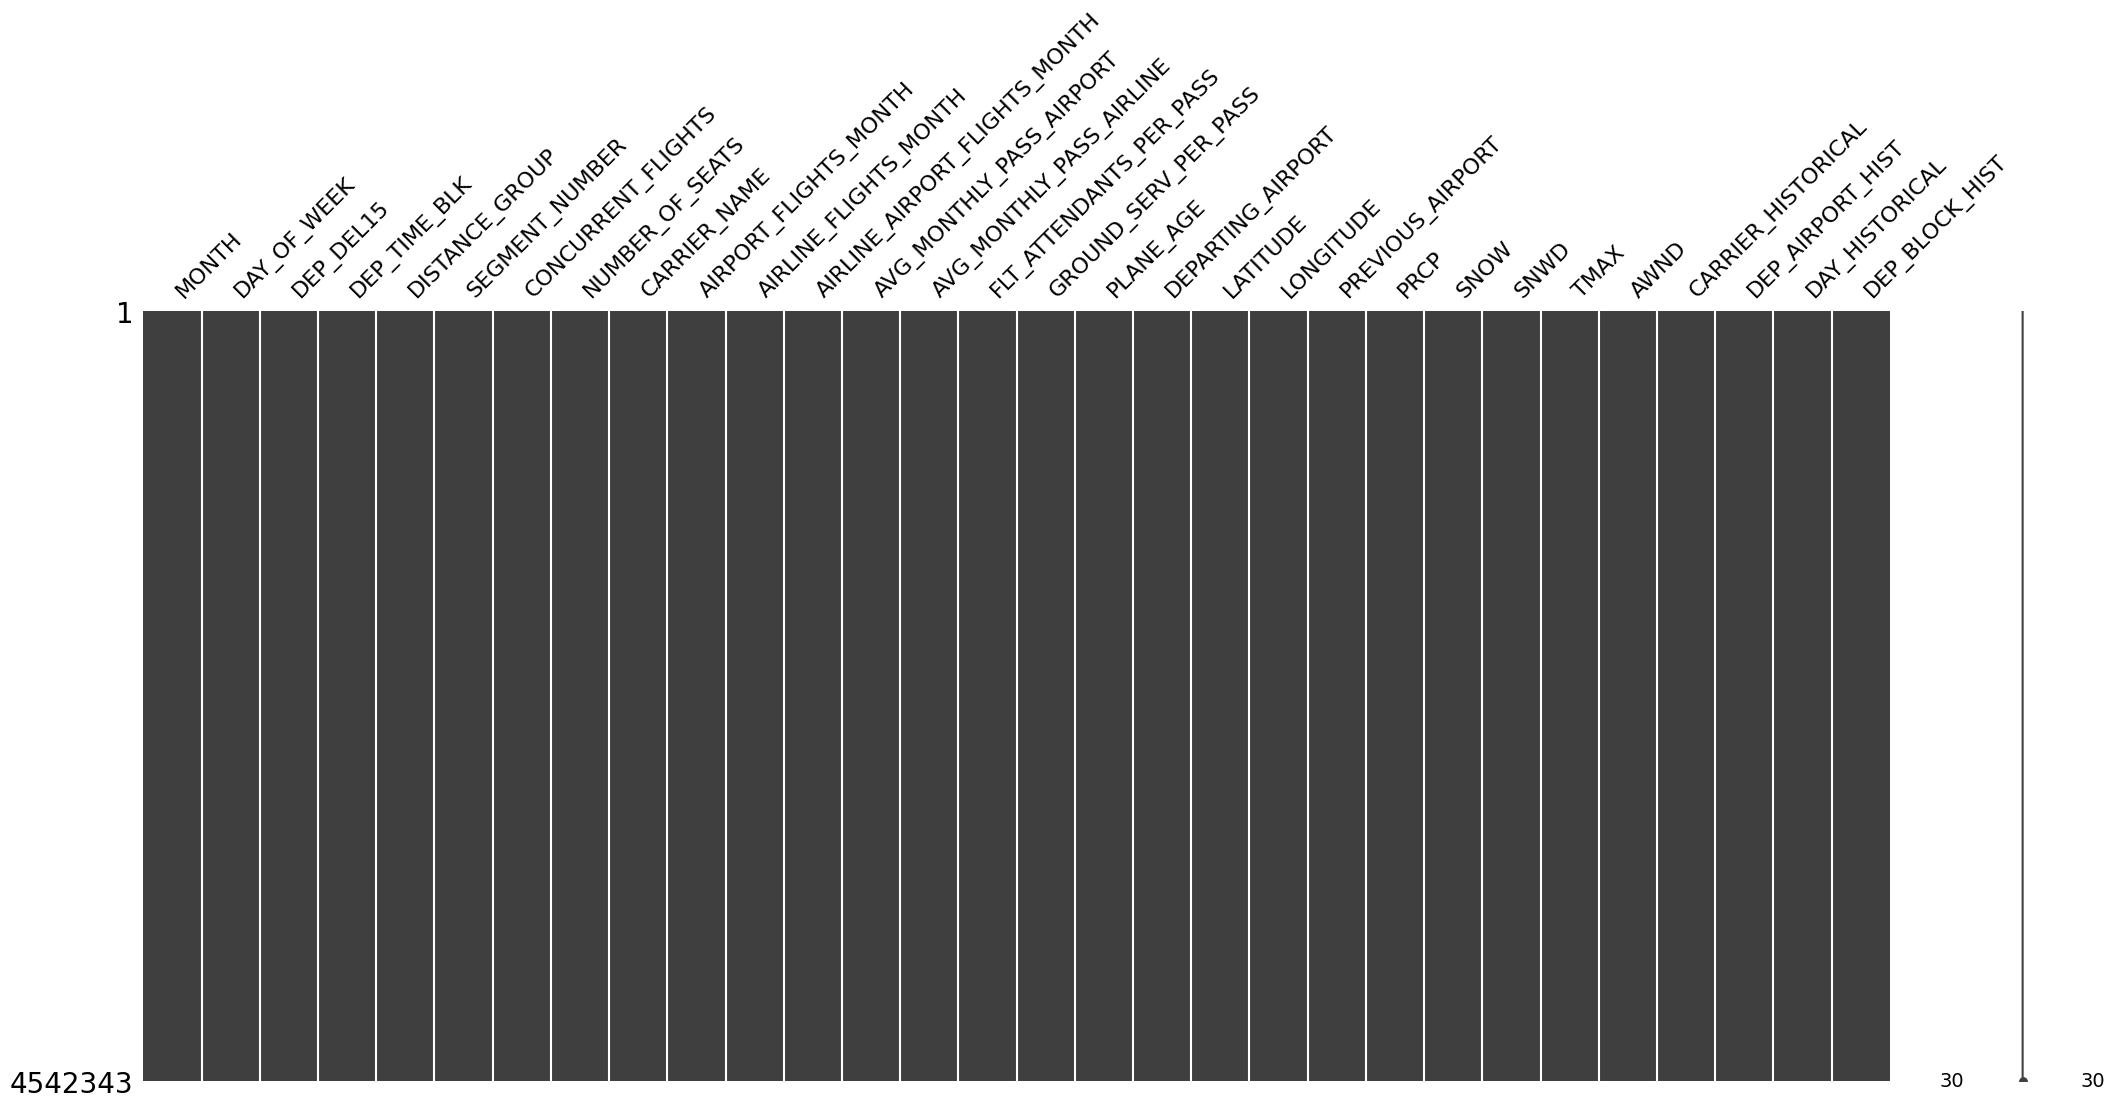

In [9]:
msno.matrix(df)

Podemos observar que el data set no pose valores nulos, lo que implica que no es necesario realizar tratamiento de valores nulos. Sin embargo, la ausencia de valores NaN no implica que haya valores que se identifiquen como no nulos. Para esto se buscará valores nulos representados por el valor 0 en variables que no deberían serlo. Esto solo en variables númericas.



In [10]:
col = ['MONTH','DAY_OF_WEEK','DISTANCE_GROUP','SEGMENT_NUMBER','CONCURRENT_FLIGHTS','NUMBER_OF_SEATS','AIRPORT_FLIGHTS_MONTH','AIRLINE_FLIGHTS_MONTH',
       'AIRLINE_AIRPORT_FLIGHTS_MONTH','AVG_MONTHLY_PASS_AIRPORT','AVG_MONTHLY_PASS_AIRLINE','FLT_ATTENDANTS_PER_PASS','GROUND_SERV_PER_PASS','PLANE_AGE','LATITUDE',
       'LONGITUDE','PRCP','SNOW','SNWD','TMAX','AWND','CARRIER_HISTORICAL','DEP_AIRPORT_HIST','DAY_HISTORICAL','DEP_BLOCK_HIST']

for i in col:
    col_w_zeros = (df[i] == 0).sum()  # Cuenta cuántos valores son 0 en la columna
    if col_w_zeros > 0:
        print(f'La columna {i} tiene {col_w_zeros} registros de valores con cero')

La columna FLT_ATTENDANTS_PER_PASS tiene 489195 registros de valores con cero
La columna PLANE_AGE tiene 84396 registros de valores con cero
La columna PRCP tiene 3189027 registros de valores con cero
La columna SNOW tiene 4428715 registros de valores con cero
La columna SNWD tiene 4421479 registros de valores con cero
La columna TMAX tiene 61 registros de valores con cero
La columna AWND tiene 368 registros de valores con cero


Con esto encontramos que analizando las varibles tipo númericas solo 7 variables tienen valores 0, de los cuales, según el glosario de datos es factible que estos valores tengan como valor 0 y no implique que sea un valor nulo.

In [11]:
col = ['DEP_TIME_BLK','CARRIER_NAME','DEPARTING_AIRPORT','PREVIOUS_AIRPORT']

for i in col:
    col_w_blanks = (df[i] == '').sum()  # Cuenta cuántos valores son 0 en la columna
    if col_w_blanks > 0:
        print(f'La columna {i} tiene {col_w_blanks} registros con blancos')

Con esto se encuentra que analizando las varibles tipo objeto no hay registros con valores en blanco.

####VALORES DUPLICADOS

In [12]:
df_duplicados = df.duplicated(keep='last')  # Filtra solo las filas duplicadas
print(df_duplicados[df_duplicados==True])

311        True
319        True
437        True
557        True
1003       True
           ... 
4472455    True
4508385    True
4514418    True
4524770    True
4529437    True
Length: 14355, dtype: bool


In [13]:
df = df.drop_duplicates()
df.shape

(4527988, 30)

####OUTLINERS

#ANALISIS DE LA INFORMACIÓN

Como se menciona anteriormente, el objetivo del proyecto es determinar de manera predictiva si un vuelo puede demorarse, por lo cual, se debe entender si existen patrones que permitan entender las relaciones de las variables para poder llevar a cabo la predicción.

In [28]:
correlacion = []

for col in df.columns:
  if df[col].dtype != 'object':
    corr = df[[col,'DEP_DEL15']].corr(numeric_only=True)
    correlacion.append((col,corr.iloc[0,1]))

correlacion_df = pd.DataFrame(correlacion, columns=['Column', 'Correlation'])

print(correlacion_df)

                           Column  Correlation
0                           MONTH    -0.018683
1                     DAY_OF_WEEK    -0.000030
2                       DEP_DEL15     1.000000
3                  DISTANCE_GROUP     0.015998
4                  SEGMENT_NUMBER     0.117343
5              CONCURRENT_FLIGHTS     0.009380
6                 NUMBER_OF_SEATS     0.011734
7           AIRPORT_FLIGHTS_MONTH     0.026883
8           AIRLINE_FLIGHTS_MONTH     0.003401
9   AIRLINE_AIRPORT_FLIGHTS_MONTH     0.013950
10       AVG_MONTHLY_PASS_AIRPORT     0.024386
11       AVG_MONTHLY_PASS_AIRLINE     0.001158
12        FLT_ATTENDANTS_PER_PASS    -0.002286
13           GROUND_SERV_PER_PASS    -0.016646
14                      PLANE_AGE     0.006335
15                       LATITUDE     0.000140
16                      LONGITUDE     0.027445
17                           PRCP     0.080107
18                           SNOW     0.050233
19                           SNWD     0.026275
20           